## Research problem

Write a simple code to obtain a force dicplacment curve for different stiffness values.

0.1223648131541711


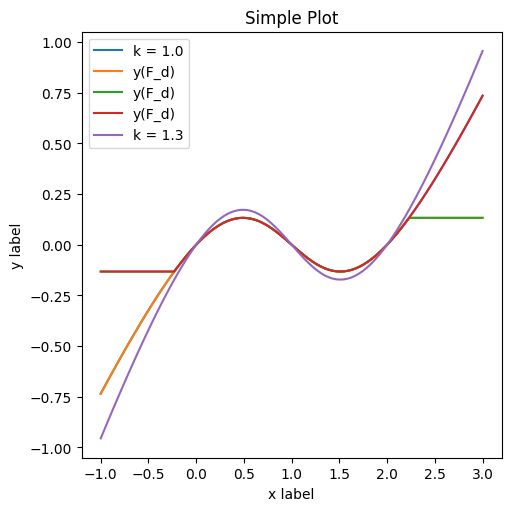

In [16]:
from math import *
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from sympy import symbols
from sympy import solveset, solve
import sympy
#from sympy import init_session
#init_session()
from sympy import solve_poly_system

import numpy as np
from scipy.optimize import root

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets



""" some vars
    L_1y, L_1x, L_2x, L_2y = 1.0, 1.0, 1.0, 1.0
    k_1 = 1.0
    k_2 = 1.3

    L_1 = (L_1x**2 + L_1y**2)**0.5
    L_2 = sqrt(L_2x**2 + L_2y**2)
 """

def F_d(d, k = 1., L_x = 1., L_y = 1.):
    # d - spring deformation
    L = (L_x**2 + L_y**2)**0.5 # spring length at initial moment
    L_d = (L_x**2 + (L_y - d)**2)**0.5 # length after deformation
    f_s = k*(L - L_d) # spring force
    f_d = f_s * (L_y - d)/L_d # force to piston
    return f_d

# x_FD test data
def func(x):
    return F_d(x) - F_d(0.2345)

sol = root(func, 0.25)
sol.x
sol.fun

print(F_d(0.2345, 1.3))


# Inverse functon. It requares good starting points.
def y_Fd(f_d, k = 1.3):
    kk = k
    set_x = [0, 1, 2]
    def func(x):
        return F_d(x, kk) - f_d
    
    ans = []
    for x1 in set_x:
        sol = root(func, x1)
        ans.append(float(sol.x))
    return ans

#Searching 

# plotting
#region

x = np.linspace(-1, 3, 100)  # Sample data.

nlist = [y_Fd(F_d(i, k = 1), k = 1) for i in x]



nnlist1 = [F_d(i[0], k = 1) for i in nlist]
nnlist2 = [F_d(i[1], k = 1) for i in nlist]
nnlist3 = [F_d(i[2], k = 1) for i in nlist]

#for i in nlist:
#    print(i[0])


#
fig, ax = plt.subplots(figsize=(5, 5), layout='constrained')
ax.plot(x, F_d(x, k = 1), label='k = 1.0')  # Plot some data on the axes.

ax.plot(x, nnlist1, label='y(F_d)')
ax.plot(x, nnlist2, label='y(F_d)')
ax.plot(x, nnlist3, label='y(F_d)')

ax.plot(x, F_d(x, k = 1.3), label='k = 1.3')  # Plot more data on the axes...
#ax.plot(x, F_d(x)[2], label='f_s')  # ... and some more.
ax.set_xlabel('x label')  # Add an x-label to the axes.
ax.set_ylabel('y label')  # Add a y-label to the axes.
ax.set_title("Simple Plot")  # Add a title to the axes.
ax.legend()  # Add a legend.

plt.show()
#endregion

In [17]:
a = widgets.FloatSlider(
    value=7,
    min=0,
    max=10,
    step=0.1,
    description='Test:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f'
)

def f(x):
    print(x)



display(a)
print(a.value)

FloatSlider(value=7.0, continuous_update=False, description='Test:', max=10.0, readout_format='.1f')

7.0


In [18]:
interact(f, x=10);

interactive(children=(IntSlider(value=10, description='x', max=30, min=-10), Output()), _dom_classes=('widget-…

: 

Next step. Create a procedure that calculate position of first and second piston in absolute coordinate system.
1. Iteration algorithm find an equilibrium using condition of equality of Y-forces.

